# pridect employee salary based on year of exprience

 #### importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

 ### import data set and extrect dependent and independent variables

In [2]:
salary_data=pd.read_csv("Salary_Data.csv")
x=salary_data.iloc[:,:-1].values               #x is a predicator  ,independent
y=salary_data.iloc[:,1].values                 # y is a target  ,dependent

### vsulazition of data

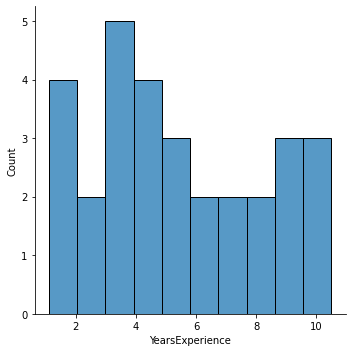

In [3]:
sns.displot(salary_data["YearsExperience"],kde=False,bins=10)

C:\Users\Afzal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='YearsExperience', ylabel='count'>

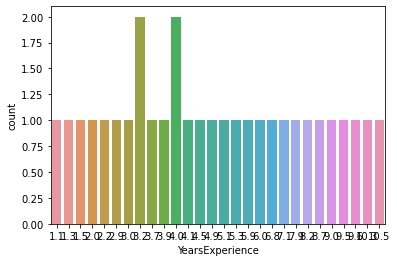

In [4]:
sns.countplot(salary_data["YearsExperience"],data=salary_data)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

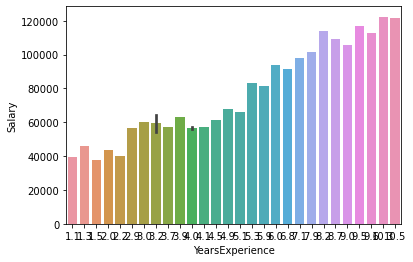

In [5]:
sns.barplot(x="YearsExperience",y="Salary",data=salary_data)

<AxesSubplot:>

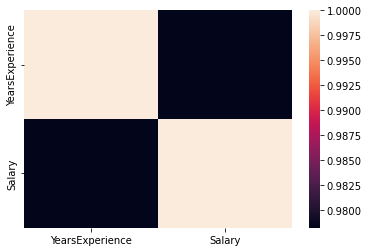

In [6]:
sns.heatmap(salary_data.corr())

### split the data into traning set  and test set

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=1/3,random_state=0)

In [9]:
x_train[:5]

array([[2.9],
       [5.1],
       [3.2],
       [4.5],
       [8.2]])

In [10]:
x_test[:5]

array([[ 1.5],
       [10.3],
       [ 4.1],
       [ 3.9],
       [ 9.5]])

In [11]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [12]:
y_train

array([ 56642,  66029,  64445,  61111, 113812,  91738,  46205, 121872,
        60150,  39891,  81363,  93940,  57189,  54445, 105582,  43525,
        39343,  98273,  67938,  56957], dtype=int64)

In [13]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088, 101302], dtype=int64)

## fetting simple liner regression to the data training set

In [15]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.score(x_test,y_test))

0.9749154407708353


##  predicting the test set result

In [60]:
y_pred=lr.predict(x_test)  # it will take one parameter only independent parameter
y_pred

array([ 40835.10590871, 123079.39940819,  65134.55626083,  63265.36777221,
       115602.64545369, 108125.8914992 , 116537.23969801,  64199.96201652,
        76349.68719258, 100649.1375447 ])

## vasulizing the traning set result

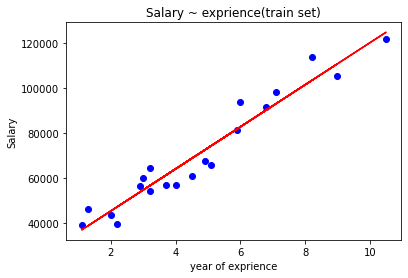

In [78]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,lr.predict(x_train),color="red")
plt.title("Salary ~ exprience(train set)")
plt.xlabel("year of exprience")
plt.ylabel('Salary')
plt.show()


## vasulizing the test set result

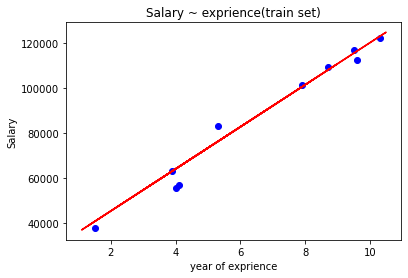

In [65]:
plt.scatter(x_test,y_test,color="blue")
plt.plot(x_train,lr.predict(x_train),color="red")
plt.title("Salary ~ exprience(train set)")
plt.xlabel("year of exprience")
plt.ylabel('Salary')
plt.show()

### finding the residuals("error")

In [71]:
# calculating the residual,there are various way to find 
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test,y_pred)


21026037.329511296

In [75]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred))
np.sqrt(metrics.mean_absolute_error(y_test,y_pred))

3426.4269374307123


58.53568943329114